# Neural Networks (in action)

--- 

### Topics in Economtrics and Statistics

> Summer 2020, Tim Mensinger

## The Data

We consider the classic handwritten digit recognition problem on the [MNIST](http://yann.lecun.com/exdb/mnist/) data set. The data set contains 70,000 images and respective labels (0, ..., 9). Each image is defined by a 28x28 matrix with entries corresponding to gray-scale values in [0, 1]. The data is split into a training (60,000 samples) and testing (10,000 samples) set.

> **Note:**
> The features (images) are standardized before training the model. The testing data is standardized using the mean and standard deviation of the training data, since, strictly speaking, this is already part of model step.   

In [1]:
from nnet.data import get_mnist_data
from nnet.data import get_batch
from nnet.data import Data

from nnet.plotting import plot_examples
from nnet.plotting import plot_performance

In [2]:
data = get_mnist_data()

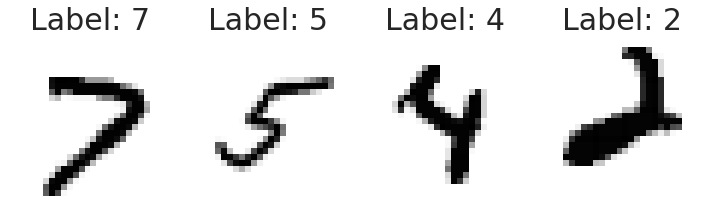

In [3]:
plot_examples(data.train)

## The Network

We build a plain vanilla [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) network. The input dimension is a vector of all pixels (28 ** 2) and the output dimension is a 10 dimensional vector, corresponding to a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics) of the labels. For this project we choose two hidden layers, each with 28 neurons. This gives us a total number of parameters of 23,082. For comparison, inversion of a 25,000 by 25,000 matrix consumes ~5GB memory.

> **Note:**
> Choosing the hidden layers, i.e. the network structure, is a science in itself, and sometimes even considered as an art, rather than a science. 

A brilliant overview of different solutions is found in the respective [Kaggle competition](https://www.kaggle.com/competitions/digit-recognizer). [State-of-the-art solutions](https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist?scriptVersionId=73454105) can achieve a test accuracy of 99.757%. These methods often combine two powerful ideas. First, they use some form of data augmentation to expand the training set and robustify their results. And second, they utilize ideas from classical statistics to regularize the model. Combined, this allows them to build huge models without overfitting.

### Build the Network

In [4]:
from nnet.network import build_network
from tqdm.auto import tqdm

import jax.numpy as jnp

In [5]:
image_dim = 28  # number of pixels
structure = [image_dim ** 2, 28, 28, 10]

In [6]:
network = build_network(
    structure=structure,
    loss_type="cross_entropy",
    activation_type="relu",
    algorithm="adam",
    tqdm=tqdm,
)

In [ ]:
result = network.fit(data, n_epochs=100, batch_size=2000, tol=1e-5)

### Performance Log

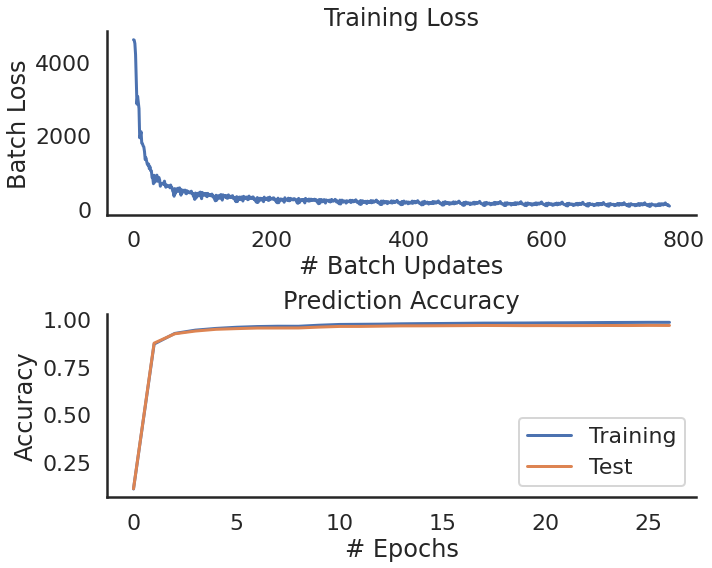

In [8]:
plot_performance(result.log)

### Predict Test Labels

In [9]:
pred = network.predict(result.params, data.test.images)

### Mislabeled

In [10]:
mislabeled = f"Mislabeled on test set: {(1 - result.log.test[-1]) * 100:.2f} %"
mislabeled

'Mislabeled on test set: 3.44 %'

In [11]:
_data = {
    name: Data(
        images=data.test.images[mask], 
        labels=data.test.labels[mask], 
        predictions=pred[mask]
    )
    for name, mask in zip(["wrong", "correct"], [pred != data.test.labels, pred == data.test.labels])
}

### Mislabeled Example

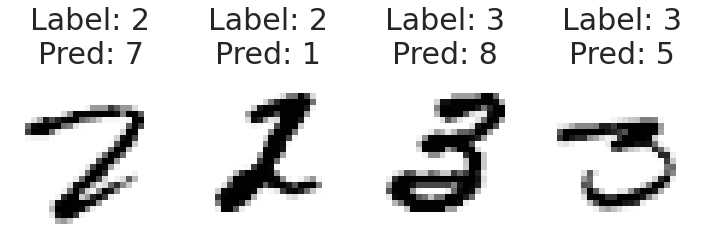

In [12]:
plot_examples(_data["wrong"])

---
---
---

### Correctly Labeled Examples

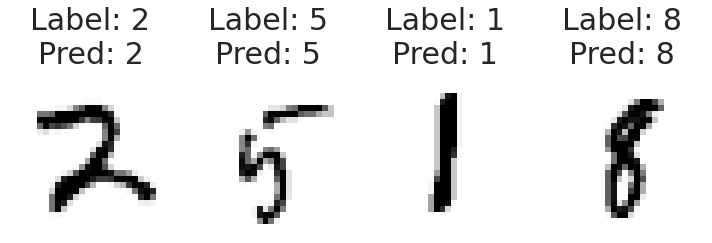

In [13]:
plot_examples(_data["correct"])